In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd

df = pd.read_csv('../base_dados/beber_sem_duplicata.csv', low_memory=False)

SVM Padrão:


              precision    recall  f1-score   support

           0       0.70      0.64      0.67     84709
           1       0.68      0.73      0.70     87161

    accuracy                           0.69    171870
   macro avg       0.69      0.69      0.69    171870
weighted avg       0.69      0.69      0.69    171870

Matriz de Confusão (SVM Padrão):
 [[54175 30534]
 [23161 64000]]


SVM com Kernel RBF:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67     84709
           1       0.68      0.73      0.70     87161

    accuracy                           0.69    171870
   macro avg       0.69      0.69      0.69    171870
weighted avg       0.69      0.69      0.69    171870

Matriz de Confusão (SVM com Kernel RBF):
 [[54175 30534]
 [23161 64000]]


Resultados de Acurácia salvos com sucesso.


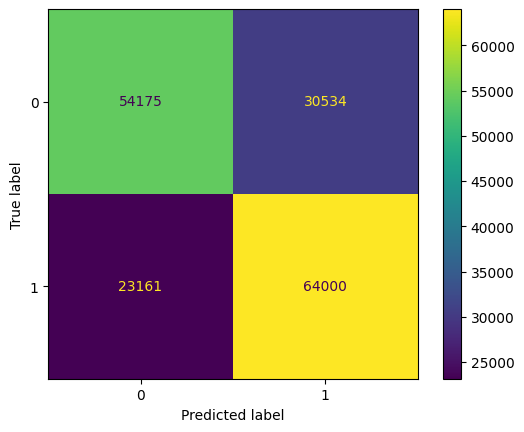

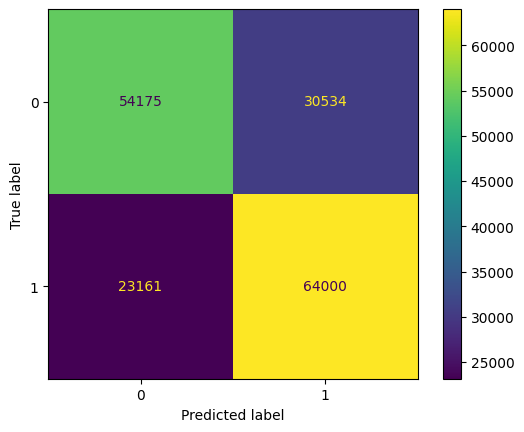

In [2]:
# Remover 70% da base de dados
# df = df.drop(df.sample(frac=0.7, random_state=42).index)

# Separar features e target
X = df.drop('drk_yn', axis=1)
y = df['drk_yn']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM padrão
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("SVM Padrão:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão - SVM Padrão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão (SVM Padrão):\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# SVM com kernel diferente (exemplo: 'rbf')
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(X_train, y_train)
y_pred_rbf = svm_model_rbf.predict(X_test)
print("SVM com Kernel RBF:")
print(classification_report(y_test, y_pred_rbf))

# Matriz de Confusão - SVM com Kernel RBF
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print("Matriz de Confusão (SVM com Kernel RBF):\n", cm_rbf)
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf)
disp_rbf.plot()

# cm_df = pd.DataFrame(cm, index=[f'Classe {i}' for i in range(len(cm))], columns=[f'Classe {i}' for i in range(len(cm))])
# cm_df.to_csv('../base_dados/resultados_mineracao_dados/matriz_confusao_svm_sem_duplicata.csv', index=True)


accuracy = accuracy_score(y_test, y_pred)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Criar DataFrame com resultados de acurácia
resultados = pd.DataFrame({
    'Modelo': ['SVM Padrão', 'SVM com Kernel RBF'],
    'Acurácia': [accuracy, accuracy_rbf]
})

# Salvar no CSV
resultados.to_csv('../base_dados/resultados_mineracao_dados/resultado_svm_sem_duplicata.csv', index=False)

print("Resultados de Acurácia salvos com sucesso.")